In [39]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
from datascience import *

# These lines set up the plotting functionality and formatting.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [40]:
movies = Table.read_table('movies.csv')
movies.where("Title", "wild wild west").select(0, 1, 2, 3, 4, 14, 49, 1042, 4004)

Title,Year,Rating,Genre,# Words,breez,england,it,bravo
wild wild west,1999,4.3,comedy,3446,0,0,0.0212635,0


In [41]:
title_index = movies.index_by('Title')
def row_for_title(title):
    """Return the row for a title, similar to the following expression (but faster)
    
    movies.where('Title', title).row(0)
    """
    return title_index.get(title)[0]

In [42]:
row_for_title('the terminator').item('none') 

0.0009633911368015

In [43]:
# Set row_sum to a number that's the (approximate) sum of each row of word proportions.
expected_row_sum = 1

In [44]:
# Just run this cell.
vocab_mapping = Table.read_table('stem.csv')
stemmed = np.take(movies.labels, np.arange(3, len(movies.labels)))
vocab_table = Table().with_column('Stem', stemmed).join('Stem', vocab_mapping)
vocab_table.take(np.arange(1100, 1110))

Stem,Word
bond,bonding
bone,bone
bone,boning
bone,bones
bonu,bonus
book,bookings
book,books
book,booking
book,booked
book,book


In [45]:
stemmed_message =  vocab_table.where("Word","vegetable").column(0).item(0)
stemmed_message

'veget'

In [46]:
most_stem = vocab_table.group("Stem").sort("count", descending = True).column(0).item(0)
most_stem

'gener'

In [77]:
# In our solution, we found it useful to first add columns with
# the length of the word and the length of the stem,
# and then to add a column with the difference between those lengths.
# What will the difference be if the word is not shortened?

tbl_with_lens = vocab_table.with_columns("Stem Length", vocab_table.apply(len, "Stem") , "Word Length", vocab_table.apply(len, "Word"))

tbl_with_dif = tbl_with_lens.with_column("Diff", tbl_with_lens.column("Word Length") - tbl_with_lens.column("Stem Length"))


longest_uncut = tbl_with_dif.where("Diff", 0).sort("Word", descending = True).sort("Word Length", descending = True).column("Word").item(0)
longest_uncut

'misunderstand'

## 3. Relationships Between Pairs of Words

In [36]:
she_her = movies.select("she", "her")
she_her

she,her
0.0061667,0.00676348
0.00929316,0.00450577
0.00224593,0.000748643
0.00330797,0.00198478
0.0010981,0.00146413
0,0.0016129
0.00207727,0
0.00388469,0.00163566
0.00283661,0.00189107
0.0068835,0.00361384


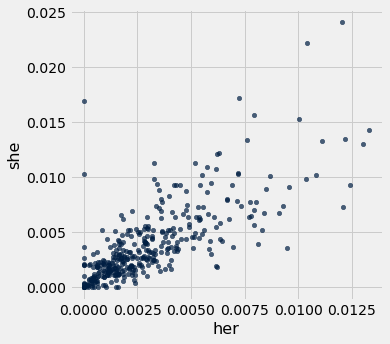

In [38]:
she_her.scatter("her", "she")

In [91]:
she_mean = np.mean(she_her.column("she"))
she_std = np.std(she_her.column("she"))
her_mean = np.mean(she_her.column("her"))
her_std = np.std(she_her.column("her"))

she_her_standard = Table().with_columns(
    "she (standard units)", (she_her.column("she") - (she_mean))/she_std,
    "her (standard units)", (she_her.column("her") - (her_mean))/her_std
)

she_her_standard

she (standard units),her (standard units)
0.64874,1.41556
1.54528,0.555731
-0.475576,-0.875146
-0.171026,-0.40437
-0.804727,-0.602658
-1.11962,-0.545998
-0.523939,-1.16026
-0.00564772,-0.537332
-0.306193,-0.440059
0.854288,0.216043


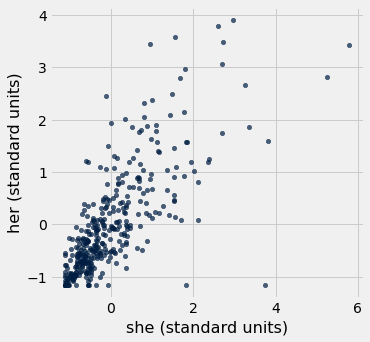

In [92]:
she_her_standard.scatter("she (standard units)","her (standard units)")

In [93]:
correlation = 1

In [95]:
a = she_her_standard.with_column('product of standard units', she_her_standard.column("she (standard units)") * she_her_standard.column("her (standard units)" ))
a
r = np.mean(a.column("product of standard units"))
r

0.74953528976920514

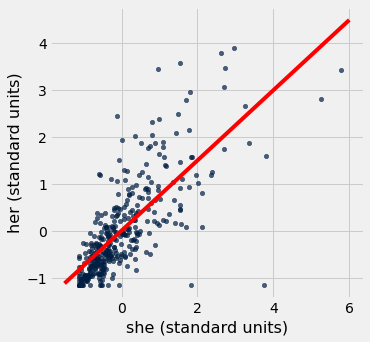

In [101]:
def draw_line(slope=0, intercept=0, x=make_array(-1.5, 6), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)

she_her_standard.scatter('she (standard units)', 'her (standard units)')
draw_line(slope = r)

In [102]:
slope = r * (her_std/she_std)
slope

0.56436875787214202

In [107]:
intercept = slope * (she_mean/she_her.num_rows) + (-slope * she_mean + her_mean)
intercept

0.00084900441460750316

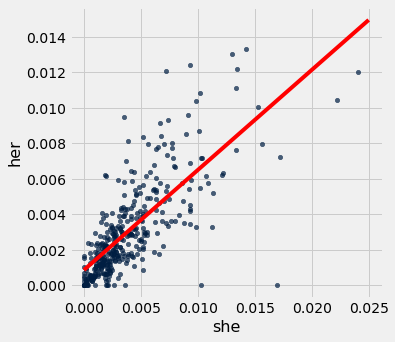

In [108]:
she_her.scatter('she', 'her')
draw_line(slope = slope, intercept = intercept,  x = make_array(0,0.025))